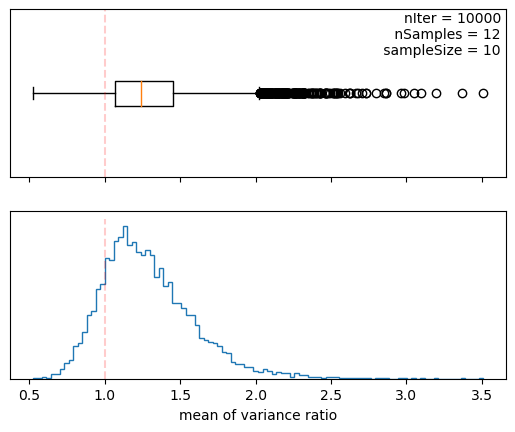

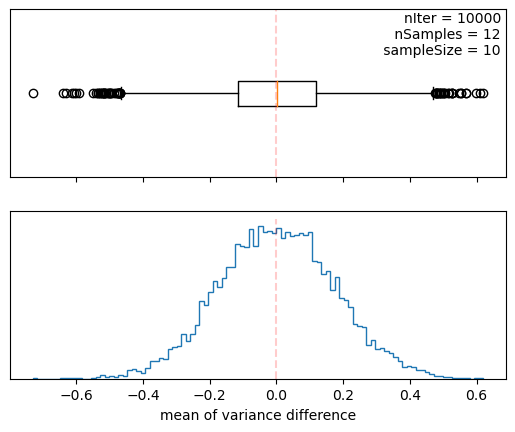

In [160]:
import numpy
from matplotlib import pyplot

# Compute means of variance ratios
nIter = 10000    # Number of times to repeat calculation
nSamples = 12    # Number of samples
sampleSize = 10  # Size of each sample

# Generate a random sample of size sampleSize
def genSample():
    return numpy.random.normal(size=sampleSize)

# Generate nSamples pairs random samples and compute the variance ratio for each
def genStatistic(statString):
    if statString == 'variance ratio':
        return [numpy.var(genSample()) / numpy.var(genSample()) for i in range(nSamples)]
    elif statString == 'variance difference':
        return [numpy.var(genSample()) - numpy.var(genSample()) for i in range(nSamples)]
    else:
        raise RuntimeError(f'{statString} not supported')

# Create a figure summarizing our results
def plotDistribution(data):
    # Open figure
    fig, axes = pyplot.subplots(2, 1, sharex=True, sharey=False)
    
    # Make boxplot
    pl = axes[0].boxplot(means, vert=False)
    axes[0].get_yaxis().set_visible(False)
    
    # Annotate plot
    axes[0].text(.99, .99, f'nIter = {nIter}\n nSamples = {nSamples}\n sampleSize = {sampleSize}', 
            transform=axes[0].transAxes, ha='right', va='top')
    
    # Plot PDF
    pl = axes[1].hist(means, bins=100, histtype='step', density=True)
    axes[1].set_xlabel(f'mean of {stat}')
    
    # Turn off y-axes
    for ax in axes: ax.get_yaxis().set_visible(False)
        
    # Add lines for expected values
    for ax in axes: ax.plot((expectedValue, expectedValue), ax.get_ylim(), color='red', linestyle='dashed', alpha=0.2)  
    
    return fig

# Compare our expectations with actual distributions for selected statistics
for stat, expectedValue in zip(('variance ratio', 'variance difference'), (1, 0)):
    # Compute means of variance ratios
    means = [numpy.mean(genStatistic(stat)) for i in range(nIter)]

    # Plot our results
    fig = plotDistribution(means)